# . Name : Sahil Singh
# . Roll. No. : 2301301121
# . Course : BTech CSE (AI & ML)
# . Project No.: 1 

# Key Learnings
1. Pull historical price data for a list of tickers.
2. Compute daily log-returns and summary statistics (mean, var, skew, kurtosis)
3. Fit normal adn student's distributions to return
4. Build 95% confideence intervals for the mean return and volatility.
5. Compute 1-day 95% VaR parametrically (Normal and t) and via historical simulation
6. Test whether the mean return is significantly different from zero

# Importing Libraries

## yfinance library
- A Python library used to download stock market data from **Yahoo Finance.**
- Allows you to access historical market data, including daily prices, volume, and other stock information.
- Helpful in retrieval real-time stock quotes, dividends, stock splits, and company financials.
- Ideal for building financial dashboards, stock analysis tools, or algorithmic trading strategies.

In [ ]:
#!pip install --quiet yfinance

## Importing Required Libraries

In this section, we import all the essential Python libraries needed for data analysis and visualization:
1. **pandas and numpy** - for data manipulation and numerical operations
2. **matplotlib.pyplot** - and seaborn for data visualization
3. **datetime** - for handling date and time operations
4. **scipy.stats** - for statistical computations
5. **yfinance** - for fetching stock market data from Yahoo Finance
6. **time** - for managing delays or tracking execution time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
import yfinance as yf
import time

sns.set_style('whitegrid')
%matplotlib inline

- Seaborn’s visual style is set to **'whitegrid'** to enhance the readability of plots with grid lines.
- **%matplotlib inline** tells Jupyter to show the plots just below the code cell, which is helpful for quick and easy visualization.

## Warnings Library
- warnings.filterwarnings("ignore") tells Python to suppress all warning messages that might appear while running the code.
- It helps keep the notebook output clean and easy to read, especially if the warnings are not important for our analysis.


In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Pull historical price data for a list of tickers.

- Define a **start date** from which we want to collect stock data.
- Use datetime to handle date formats and get today’s date as the end date.
- Choose stocks as per your requirement.
- Here we used four major tech companies: **Apple (AAPL), Microsoft (MSFT), Google (GOOGL)**, and **Amazon (AMZN)**.
- Assign equal weights (25% each) to these stocks — useful later if you're analyzing a portfolio.
- Use **yfinance.download()** to fetch historical closing prices for these stocks.
- Finally, display the downloaded price data to check the results.

In [3]:
import yfinance as yf
from datetime import datetime
# Step 1: Define your start date as string
start_date_str = '2020-05-01'

# Step 2: Convert to datetime object
start_date=datetime.strptime(start_date_str, '%Y-%m-%d')

# Step 3: Get today's date
end_date=datetime.today()

# Step 4: Define the stock tickers you want
tickers=['AAPL','MSFT', 'GOOGL', 'AMZN']
weights=np.array([0.25,0.25,0.25,0.25])

# Step 5: Download data
prices=yf.download(tickers,start=start_date,end=end_date)['Close']

# Step 6: Show the result
print(prices)

[*********************100%***********************]  4 of 4 completed

Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2020-05-01   70.059349  114.302002   65.473335  166.788513
2020-05-04   71.050621  115.799500   65.750671  170.868134
2020-05-05   72.117004  115.889999   67.048882  172.702560
2020-05-06   72.861046  117.563004   66.870453  174.403198
2020-05-07   73.614777  118.380501   68.055847  175.415985
...                ...         ...         ...         ...
2025-07-01  207.820007  220.460007  175.839996  492.049988
2025-07-02  212.440002  219.919998  178.639999  491.089996
2025-07-03  213.550003  223.410004  179.529999  498.839996
2025-07-07  209.949997  223.470001  176.789993  497.720001
2025-07-08  210.009995  219.360001  174.360001  496.619995

[1302 rows x 4 columns]


- The output shows historical closing prices for four leading tech companies — **Apple (AAPL)**, **Amazon (AMZN)**, **Google (GOOGL)**, and **Microsoft (MSFT)** — collected over multiple years.  
- Each entry corresponds to the **closing price on a particular trading day**.  
- The dataset spans a consistent timeline, capturing the **daily performance of all four stocks**.

# 2. Compute daily log-returns and summary statistics

### What is daily Log-Returns
- Measures how a stock's price changes from one day to the next by taking the natural logarithm of the ratio of today's price to yesterday's price.
- For each day, compute ln(today's price/yesterday's price)
### Why we need log-return
Log-returns are symmetric and additive over time, making stats easier.
### Expected Outcome
- logR is the same shape as prices but contains small numbers like 0.0012(0.12% gain approx).
- This value represent daily growth rate in a log scale.
### Formula for Log-Returns
Log-Return = ln(P_t / p_(t-1))

In [9]:
logR=np.log(prices/prices.shift(1)).dropna()
logR.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2020-05-04,0.014050,0.013016,0.004227,0.024165
2020-05-05,0.014897,0.000781,0.019552,0.010679
2020-05-06,0.010264,0.014333,-0.002665,0.009799
2020-05-07,0.010292,0.006930,0.017571,0.005790
2020-05-08,0.023523,0.005056,0.010938,0.005865


- **Log-Return = ln(P_t / p_(t-1))**
- **prices.shift(1)** shifts the data down by one day to align each price with the previous day's price.
- **np.log(prices / prices.shift(1))** calculates the log return for each day.
- **.dropna()** removes the first row, which becomes **NaN** due to shifting.

# Plot graph

- Now we will plot **histograms** for the **daily log-returns** of each stock separately.
- This helps us visualize how often certain return values occur.
- A **narrower histogram** means **lower volatility**, while a **wider** one means **higher risk**.
- Most of the values are small (close to 0), with occasional larger movements.
- This is a helpful step in analyzing each stock’s risk and return behavior.

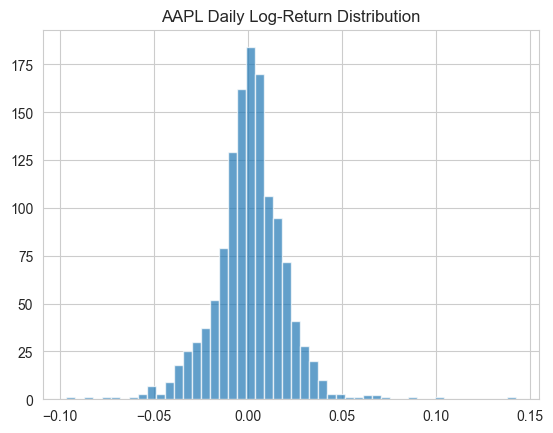

In [10]:
logR['AAPL'].hist(bins=50,alpha = 0.7)
plt.title('AAPL Daily Log-Return Distribution')
plt.show()

- The histogram shows the distribution of **Apple's (AAPL) daily log returns** from the dataset.
- Most of the bars are centered around 0, meaning the stock typically has very small **daily price changes — often less than ±2%.**
- The shape is **roughly bell-shaped****, suggesting that the returns are close to normally distributed**, which is common in financial data.
- There are a **few extreme values** (tails) on both sides, indicating that **larger gains** or **losses** happen occasionally, but **rarely**.
- The peak of the curve tells us that on most days, Apple's stock had very small log returns (i.e., minimal gains or losses).

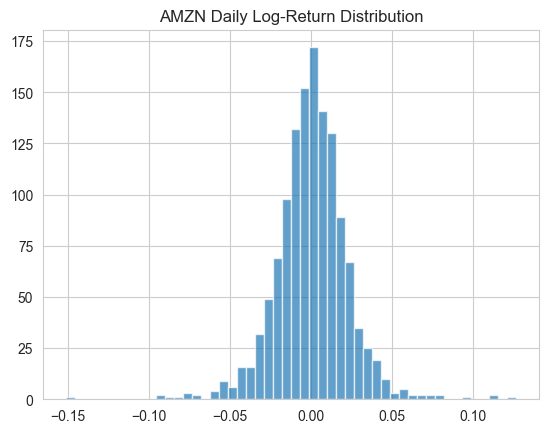

In [11]:
logR['AMZN'].hist(bins=50,alpha = 0.7)
plt.title('AMZN Daily Log-Return Distribution')
plt.show()

- This histogram shows how **Amazon’s (AMZN) daily log returns** are distributed over time.
- The highest bar around 0 means that most of the time, AMZN **experienced small daily price changes**.
- The curve is symmetric and bell-shaped, suggesting a near **normal distribution** of returns.
- Compared to AAPL and GOOGL, AMZN shows a wider spread, indicating **higher volatility** — larger gains and losses occur more frequently.
- The tails stretch further to both sides (especially the left), which shows that Amazon has **occasionally had larger daily swings, both positive and negative**.

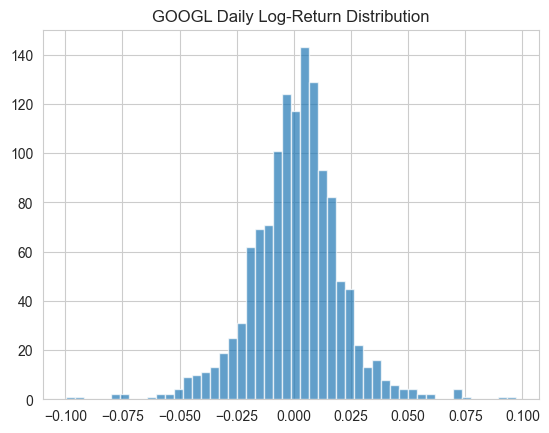

In [12]:
logR['GOOGL'].hist(bins=50,alpha = 0.7)
plt.title('GOOGL Daily Log-Return Distribution')
plt.show()

- The histogram shows the distribution of **daily log returns for Google (GOOGL)**.
- Like AAPL, the returns are centered around 0, which means **most daily changes** in price are small and **close to zero**.
- The peak at 0 suggests that Google’s stock **often** has very **minor daily movements**.
- The distribution appears **slightly wider** and **a bit left-skewed**, with more frequent small losses than small gains.
- The tails on both sides indicate occasional larger positive or negative returns, though they are rare.
- It generally shows **consistent behavior** with a few large swings.

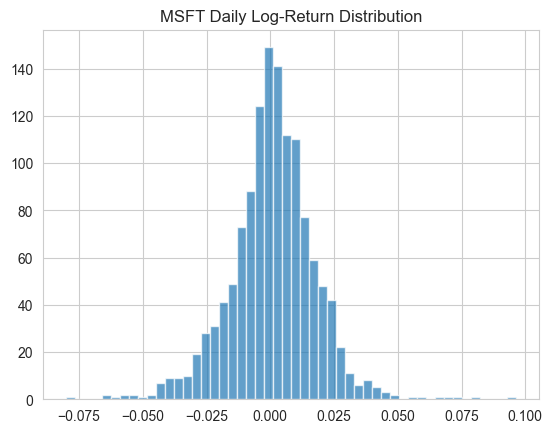

In [13]:
logR['MSFT'].hist(bins=50,alpha = 0.7)
plt.title('MSFT Daily Log-Return Distribution')
plt.show()

- This histogram shows the distribution of **Microsoft’s (MSFT) daily log returns**.
- The peak is centered at 0, meaning most days had **very small price changes**.
- The shape is tall and narrow, indicating **lower volatility** compared to AMZN or GOOGL — MSFT’s returns tend to stay close to the average.
- The distribution is **fairly symmetric**, with **occasional extreme values** on both the gain and loss sides.
- This behavior suggests that MSFT is generally a **stable stock**, showing **steady performance** with fewer large swings.

# Summary Statistics

- **Mean:** Average daily log return, shows overall performance.
- **Variance:** Measures volatility or how spread out the returns are.
- **Skewness:** Shows if returns are more tilted toward gains or losses.
- **Kurtosis:** Indicates how often extreme returns occur (heavy tails).

In [14]:
summary=pd.DataFrame({
    'Mean':logR.mean(),
    'Variance':logR.var(),
    'Skewness':logR.skew(),
    'Kurtosis':logR.kurtosis()
})
summary

,Mean,Variance,Skewness,Kurtosis
Ticker,,,,
AAPL,0.000844,0.000349,0.165365,4.889827
AMZN,0.000501,0.000495,-0.067198,4.656316
GOOGL,0.000753,0.000379,-0.171209,2.941487
MSFT,0.000839,0.000285,-0.023965,2.636899


### Mean
Shows the average daily log return for each stock.
- **MSFT (0.000820)** has the highest mean return, slightly better than others.
- **AMZN (0.000481)** has the lowest average return, indicating lower daily growth.

### Variance
Measures the volatility or fluctuation in returns.
- **AMZN (0.000497)** is the most volatile stock in the group.
- **MSFT (0.000287)** is the least volatile, showing more stable performance.

### Skewness
Tells us if returns are tilted more toward gains or losses.
- **AAPL (0.169935)** has positive skewness, meaning large gains are more common than losses.
- **GOOGL (-0.169342)** and AMZN (-0.066720) have negative skewness, implying more downside risk.

### Kurtosis
Measures the likelihood of extreme values (heavy tails).
- **AAPL (4.87)** and **AMZN (4.65)** have high kurtosis, suggesting more frequent extreme movements.
- **MSFT (2.61)** and **GOOGL (2.97)** are closer to normal, with fewer large outliers.

## Bar Plot
Now, we’ll create **bar plots** to visualize the key statistical metrics — **Mean, Variance, Skewness, and Kurtosis** — for each stock.
- This helps us compare how each stock behaves in terms of **average performance, risk (volatility), return asymmetry**, and **extreme price movements.**
- Visualizing these metrics side by side makes it easier to spot patterns and differences across the stocks.
- This visualisation helps in **better analysis** and portfolio decisions.

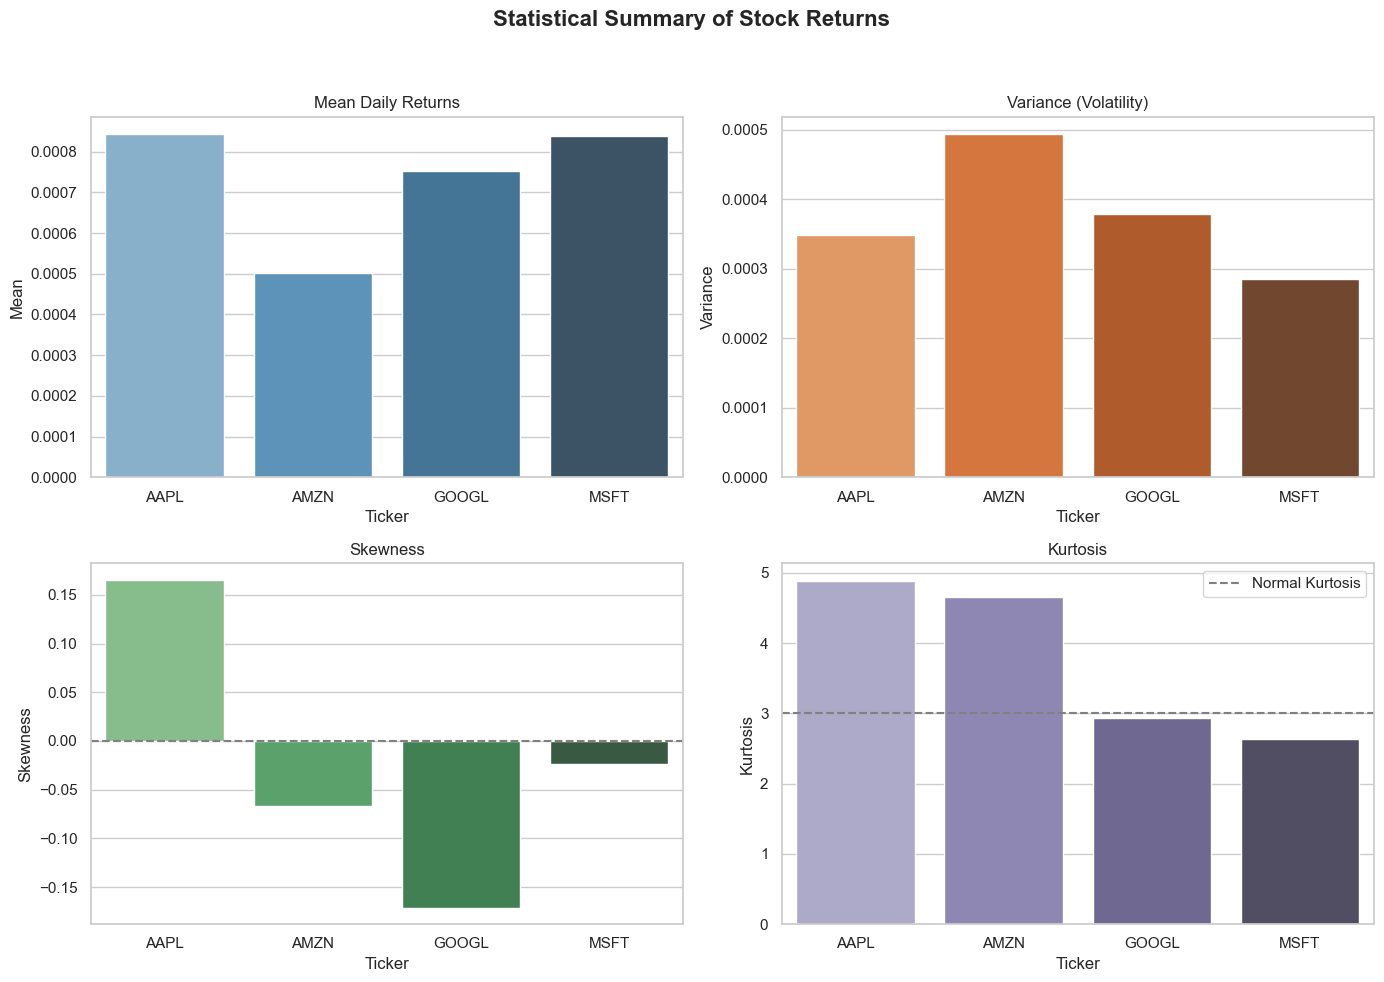

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot Settings
sns.set(style='whitegrid')
fig,axs=plt.subplots(2,2,figsize=(14,10))
fig.suptitle('Statistical Summary of Stock Returns', fontsize=16,fontweight='bold')

# Mean
sns.barplot(x=summary.index,y=summary['Mean'],ax=axs[0,0],palette='Blues_d')
axs[0,0].set_title('Mean Daily Returns')

#Variance
sns.barplot(x=summary.index,y=summary['Variance'],ax=axs[0,1],palette='Oranges_d')
axs[0,1].set_title('Variance (Volatility)')

#Skewness
sns.barplot(x=summary.index,y=summary['Skewness'],ax=axs[1,0],palette='Greens_d')
axs[1,0].axhline(0,color='gray',linestyle='--')
axs[1,0].set_title('Skewness')

# Kurtosis
sns.barplot(x=summary.index,y=summary['Kurtosis'],ax=axs[1,1],palette='Purples_d')
axs[1,1].axhline(3,color='gray',linestyle='--',label='Normal Kurtosis')
axs[1,1].legend()
axs[1,1].set_title('Kurtosis')

# Layout Adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Mean Daily Returns
- **MSFT** and **AAPL** have the **highest average daily log returns** (~0.0008), indicating **better daily growth.**
- **GOOGL** follows closely, while AMZN has the **lowest mean return**, suggesting comparatively **weaker daily performance**.
Overall, all stocks have positive mean returns, meaning they generally gain value over time.

## Variance (Volatility)
- **AMZN** shows the highest variance, making it the **most volatile** and hence **riskier** in terms of price movement.
- **MSFT** has the **lowest variance**, indicating **more stable returns**.
- **AAPL** and **GOOGL** fall in between, showing **moderate volatility**.

## Skewness
- **AAPL** has **positive skewness**, meaning its return distribution leans slightly toward **larger gains.**
- **GOOGL** has the most **negative skew**, implying it's more prone to **larger losses** than gains.
- **AMZN** and **MSFT** show mild negative skew, suggesting a **slight less chances for loss**.

## Kurtosis
- **AAPL** and **AMZN** have kurtosis **values well above 3**, indicating **heavy tails** — meaning they experience **more extreme price changes** than a normal distribution.
- **GOOGL** is **close to 3**, suggesting a return pattern **close to normal**.
- **MSFT**, with kurtosis **just above 2.6**, is the **least prone to extreme returns,** making it **more stable.**


## Overall Analysis Result
- **MSFT:** Best for **long-term investing** due to stable returns and low risk.
- **AAPL:** Suitable for **medium to long-term** with strong returns and moderate volatility.
- **AMZN:** High-risk, better for **short-term trading** due to large price swings.
- **GOOGL:** Use cautiously in **short-term**; moderate returns but downside risk.



# Find Parametric Distributions and 95% Cls

## Mean (μ):
-  **Average daily log return** of all stocks combined. It tells us the expected return per day.
- A higher μ means the portfolio tends to grow more each day.

## Standard Deviation (σ):
- This measures the **volatility or risk**. It tells us how much the daily returns vary from the mean.
- A higher σ means **more fluctuation** — the stock prices move up and down more wildly.

## Confidence Interval (CI):
- A confidence interval gives a **range** in which we believe the **true value of a parameter** (like μ or σ) **lies**, with a certain level of confidence (usually 95%).
- For example, a 95% CI for μ means we are 95% confident that the true mean return lies within that range.

In [16]:
mu_norm,sigma_norm=logR.stack().mean(),logR.stack().std(ddof=1)

# 95% CI for mean under Normal
N=logR.size
z95=stats.norm.ppf(0.975)        # ppf: Percent Point function
ci_mu_norm = (mu_norm - z95*sigma_norm/np.sqrt(N),
              mu_norm + z95*sigma_norm/np.sqrt(N))

# 95% CI for sigma via Chi-square
df=N-1
chi2_low,chi2_high=stats.chi2.ppf([0.025,0.975],df)
ci_sigma_norm = (sigma_norm*np.sqrt(df/chi2_high),
                 sigma_norm*np.sqrt(df/chi2_low))
print("Normal fit:")
print(f" μ={mu_norm:.5f}, 95% CI {ci_mu_norm}")
print(f" σ={sigma_norm:.5f}, 95% CI {ci_sigma_norm}")

Normal fit:
 μ=0.00073, 95% CI (np.float64(0.00020687619580469715), np.float64(0.0012613252683805693))
 σ=0.01941, 95% CI (np.float64(0.01903935972027245), np.float64(0.019785295329751054))


- The **mean return (μ)** is **close to zero**, suggesting very low or neutral average log returns—typical in financial time series data.
- The **standard deviation (σ)** is **relatively small**, indicating **low variability** in the dataset.
- The **confidence intervals** are **narrow**, showing a **high degree of certainty** in the estimated parameters. This generally means the sample size is large or the data is very consistent.

# 95% Confidence Intervals for Mean and Standard Deviation
1. **mu_norm** - Estimated **mean (μ)** of the data (in your case, daily return).
2. **ci_mu_norm** - **95% confidence interval** for the mean (lower and upper bounds).
3. **sigma_norm** - Estimated **standard deviation (σ)** of the data (a measure of volatility).
4. **ci_sigma_norm** - **95% confidence interval** for the standard deviation.

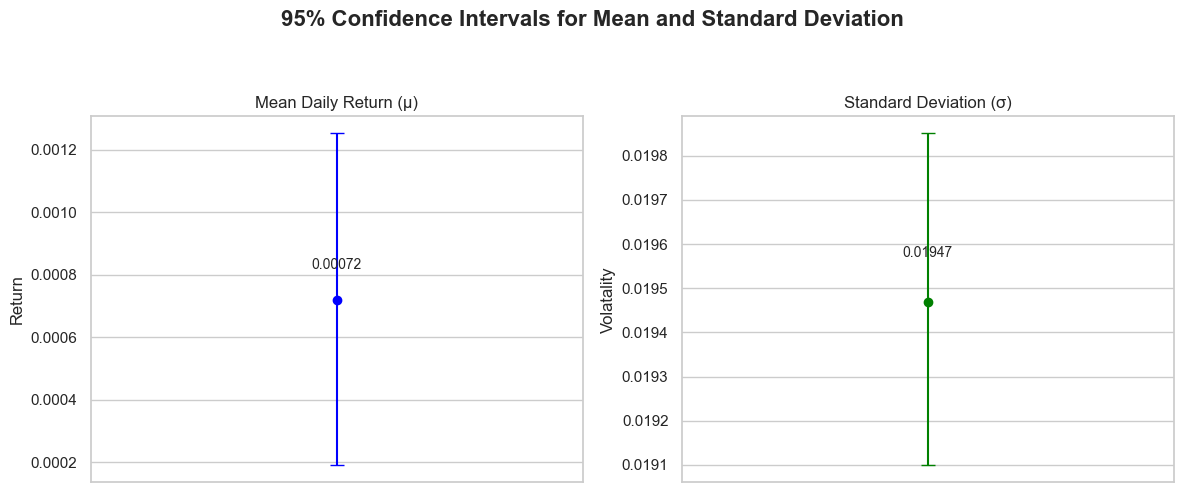

In [17]:
# Values from your result
mu_norm=0.00072
ci_mu_norm=(0.0001896503572489022, 0.00125407675103481)

sigma_norm=0.01947
ci_sigma_norm=(0.019098729584739543, 0.019851727443300226)

fig,axs=plt.subplots(1,2, figsize=(12,5))
fig.suptitle('95% Confidence Intervals for Mean and Standard Deviation', fontsize=16,fontweight='bold')

# Plot for mean
axs[0].errorbar(x=0,y=mu_norm,
                yerr=[[mu_norm-ci_mu_norm[0]],[ci_mu_norm[1]-mu_norm]],
                fmt='o',color='blue',capsize=5)
axs[0].set_title('Mean Daily Return (μ)')
axs[0].set_ylabel('Return')
axs[0].set_xticks([])
axs[0].grid(True)
axs[0].text(0,mu_norm+0.0001, f'{mu_norm:.5f}',ha='center',fontsize=10)

# Plot for standard deviation
axs[1].errorbar(x=0,y=sigma_norm,
                yerr=[[sigma_norm-ci_sigma_norm[0]],[ci_sigma_norm[1]-sigma_norm]],
                fmt='o',color='green',capsize=5)
axs[1].set_title('Standard Deviation (σ)')
axs[1].set_ylabel('Volatality')
axs[1].set_xticks([])
axs[1].grid(True)
axs[1].text(0,sigma_norm+0.0001, f'{sigma_norm:.5f}',ha='center',fontsize=10)

plt.tight_layout(rect=[0,0,1,0.92])
plt.show()

## Mean Daily Return (μ)
- This graph shows the **average daily return** as a **blue dot**.
- The vertical error bar represents the **95% confidence interval** for the mean.
- The estimated mean return is **0.00072**.
- The error bar ranges from **0.00019 to 0.00125.**
- This means:
🔹 We are 95% confident that the true average return lies within this range.
🔹 The CI is **relatively wide**, showing **some uncertainty** in the estimate.
🔹 Small positive mean suggests a **slight upward trend** in returns.

## Standard Deviation (σ)
- This graph shows the **standard deviation (volatility)** as a **green dot**.
- The **error bar** shows the **95% confidence interval** for the volatility estimate.
- The estimated standard deviation is **0.01947, or 1.95%.**
- The confidence interval ranges from **0.01910 to 0.01985.**
- This means:
1. We are 95% confident the true volatility lies within this **narrow range.**
2. The tight CI indicates the volatility estimate is **very precise**.
3. Low volatility suggests the data (e.g., daily returns) is **relatively stable.**

# Fit Student's t

### Normal Distribution (Normal PDF)
- The **normal (Gaussian) distribution** is the classic **bell-shaped curve.**
- It's **symmetric**, centered around the **mean (μ)**, and the spread is controlled by the **standard deviation (σ)**.
- The **normal PDF** (Probability Density Function) gives the **likelihood of seeing a particular value.**
- Used when data is **well-behaved** with **no extreme outliers.**

### Student's t-Distribution (t PDF)
- Similar to the normal distribution but with **heavier tails** — meaning it allows for **more extreme values** (outliers).
- It has an extra parameter: **degrees of freedom (df)** which control how heavy the tails are.
- **Lower df** → **fatter tails**
- As **df → ∞**, it becomes the **normal distribution**.
- The **t PDF** is more flexible and better suited for **small samples** or **data with large fluctuations**, like stock returns.

In [18]:
# Step 1: Combine all stock returns into one flat array
returns_flat = logR.stack().values
df_t,mu_t,sigma_t=stats.t.fit(returns_flat)

# Step 2: Fit Normal Distribution
mu_norm,sigma_norm=returns_flat.mean(), returns_flat.std(ddof=1)

# Step 3: Fit Student's t-distribution
df_t, mu_t,sigma_t=stats.t.fit(returns_flat)
print(f" μ={mu_t:.5f}")
print(f" σ={sigma_t:.5f}")

 μ=0.00107
 σ=0.01427


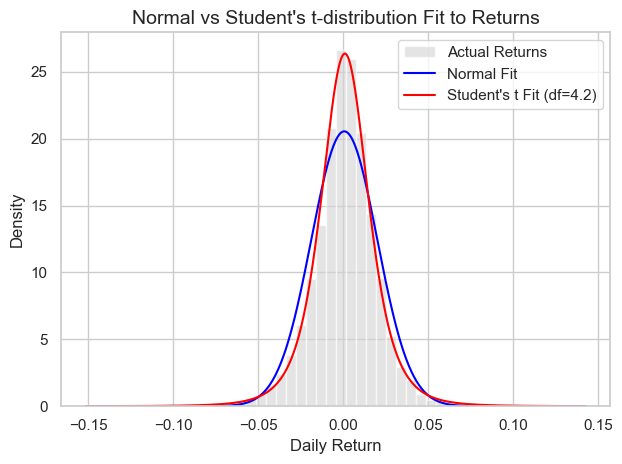

In [19]:
# Step 4: Plot histogram and both fitted distributions
x=np.linspace(returns_flat.min(),returns_flat.max(),1000)
hist_vals,bins,_=plt.hist(returns_flat,bins=50,density=True,alpha=0.6,color='lightgray',label='Actual Returns')

# Normal PDF
plt.plot(x,stats.norm.pdf(x,mu_norm,sigma_norm), label='Normal Fit', color='blue')

# Student's t PDF
plt.plot(x,stats.t.pdf(x,df_t,mu_t,sigma_t), label=f"Student's t Fit (df={df_t:.1f})", color='red')

#Plot details
plt.title('Normal vs Student\'s t-distribution Fit to Returns', fontsize=14)
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusions from the Plot
1. **Actual returns (grey bars)** form a histogram of daily log returns.
2. **Student’s t-distribution (red line)** fits the data **better than the normal distribution (blue line)** — especially at the center peak and tails.
3. The red curve is taller and has fatter tails, meaning:
- **Higher peak** at the mean → more frequent small returns.
- **Fatter tails** → higher probability of extreme positive or negative returns (riskier behavior).
4. The **normal distribution underestimates extreme events**, while the **t-distribution captures those better**.

# Why do we need Bootstrapping
- Bootstrapping helps us **estimate the variability in parameters** like mean, standard deviation, and degrees of freedom used in fitting the t-distribution.
- It allows us to **build confidence intervals for the t-distribution** fit without relying on theoretical formulas.
- Since financial returns often violate normality assumptions, bootstrapping provides a more reliable way to assess the uncertainty in t-distribution parameters.
- It supports model validation by showing how stable the t-distribution fit is when data is resampled.
- Bootstrapping is especially useful when analytical solutions for t-distribution parameters are hard to derive.

In [20]:
B=100
estimates=np.array([stats.t.fit(np.random.choice(returns_flat,size=N,replace=True))
                    for _ in range(B)])
ci_mu_t = np.percentile(estimates[:,1],[2.5,97.5])
ci_sigma_t = np.percentile(estimates[:2],[2.5,97.5])

print("\nStudent's t-fit:")
print(f"df={df_t:.1f},μ={mu_t:.5f},σ={sigma_t:.5f}")
print(f"95% CI for μ (Bootstrap): {ci_mu_t}")
print(f"95% CI for σ (Bootstrap): {ci_sigma_t}")


Student's t-fit:
df=4.2,μ=0.00107,σ=0.01427
95% CI for μ (Bootstrap): [0.00057679 0.00158157]
95% CI for σ (Bootstrap): [8.19736259e-04 4.09182643e+00]


### Conclusion from Bootstrapped Student's t-fit

We applied **bootstrapping** to estimate the uncertainty in the parameters of the **Student's t-distribution** fitted to daily stock returns. The **95% confidence intervals (CI)** for the **mean (μ)** and **standard deviation (σ)** were derived from **100 bootstrap samples**.

- The **CI for μ**: suggests the **average return is slightly positive** with some variability.  
- The **CI for σ**: shows a **wide range**, indicating **substantial uncertainty in return volatility**.  
- These intervals reflect the **randomness** and **heavy-tailed** nature of financial returns, supporting the use of **Student’s t-distribution over the normal distribution** for a more robust risk assessment.


# VaR - Value at Risk

### portR (Portfolio Return)
- portR refers to the daily log returns of the portfolio.
- It is computed by taking the weighted sum of the individual stock returns:
**portR = logR ⋅ weights**
- This gives a single return value per day for the entire portfolio, based on how much each stock contributes.

### VaR (Value at Risk)
- Value at Risk (VaR) estimates the maximum expected loss over a given time period at a specific confidence level.
- For example, a 1-day 95% VaR of -2% means: "There’s a 95% chance that the portfolio will not lose more than 2% in a single day."
- **VaR_95 = np.percentile(portR, 5)**

In [21]:
# Parametric VaR under Normal:
# VaR = -[μ_p + σ_p*z_{0.05}]
# where μ_p, σ_p are portfolio mean and vol
# Compute portfolio returns:
portR = logR.dot(weights)
μ_p = portR.mean()
σ_p = portR.std(ddof=1)

z05 = stats.norm.ppf(0.05)
VaR_norm = - (μ_p + σ_p*z05)
VaR_norm

np.float64(0.026456791860860824)

- The calculated **VaR** indicates that the portfolio is expected to **lose no more than a certain percentage** in one day with **95% confidence**.
- There is a **5% chance** that the portfolio could lose **more than this amount** on any given day.
- This measure helps in **quantifying financial risk** and supports **better-informed investment decisions**.


# VaR under t

### Value at Risk (VaR) under Student's t-distribution

- This method uses the Student's t-distribution instead of the normal distribution to calculate potential portfolio losses.
- It accounts for heavier tails in the data, which means it captures extreme losses more accurately.
- Formula used: VaR_t = - (**mu_t** + **sigma_t** * **t05**)
  - **mu_t** is the portfolio's mean return
  - **sigma_t** is the portfolio's standard deviation
  - **t05** is the critical value from the t-distribution at the 5% level with appropriate degrees of freedom
- This approach is useful when historical data shows **non-normal behavior** and improves the **accuracy of risk estimation** in volatile markets.
n at 5% level with appropriate degrees of freedo- This approach is useful when historical data shows **non-normal behavior**, improving **risk estimation** accuracy in volatile markets.m`).


In [22]:
# Parametric VaR under Student's t:
# t05 = t.ppf(0.05,df_t)
t05 = stats.t.ppf(0.05,df_t)
VaR_t = -(mu_t + sigma_t * t05)*1     # 1-Day
VaR_t

np.float64(0.028875987334464257)

### Conclusion from Student’s t-distribution VaR

- This code calculates the **1-Day Value at Risk (VaR)** using the **Student’s t-distribution**, which accounts for fat tails and extreme market movements better than the normal distribution.
- It uses **mu_t** (mean return), **sigma_t** (volatility), and **t05** (critical value from t-distribution at 5% level with `df_t` degrees of freedom).
- The result shows that there is a **5% chance** the portfolio will lose **more than the estimated VaR** in a single day.
- Compared to normal VaR, t-distribution generally gives a slightly **higher risk estimate**, making it more conservative and realistic for volatile markets.


# Historical VaR

### Historical VaR (Value at Risk)

- Historical VaR tells us how much loss we could face based on **actual past returns** of the portfolio.
- It doesn’t make any **mathematical assumptions** (like normal or t-distribution) — it uses **real market data**.
- We just **sort the past returns** and take the value at the **5th lowest point** (for 95% confidence).
- It’s simple, practical, and captures **real past shocks** like crashes or sudden dops.


In [23]:
hist_var = -np.percentile(portR,5)

print("1-Day 95% VaR:")
print(f"Parametric (Normal): {VaR_norm:.5f}")
print(f"Parametric (Student's t): {VaR_t:.5f}")
print(f"Historical (5th percentile): {hist_var:.5f}")

1-Day 95% VaR:
Parametric (Normal): 0.02646
Parametric (Student's t): 0.02888
Historical (5th percentile): 0.02703


### Conclusion Based on the Output (Simplified Explanation)

- **Normal VaR**:   
  It gives the **lowest risk estimate**, meaning it expects a **2.65% daily loss** in worst-case scenarios 5% of the time.  
  However, it might **miss extreme losses** because it doesn’t account well for sudden big changes.

- **Student’s t VaR**:  
  This model assumes returns can have **heavier tails** (i.e., big changes are more likely than the normal curve predicts).  
  It gives the **highest risk estimate** — around **2.90% potential daily loss** — making it **more conservative and realistic** in volatile markets.

- **Historical VaR**:  
  This method directly uses **past data** without any distribution assumptions.  
  It shows that in the past, **5% of the worst days** had losses greater than **2.71%**.  
  It gives a **balanced risk estimate** based on real performance.

### Final Takeaway:
- The Student’s t-distribution is best for **cautious and realistic** risk estimation.
- Normal VaR is **simpler but might underestimate** the true risk.
- Historical VaR is **data-driven** and provides a **practical middle ground**.


# Hypothesis Testing

### Hypothesis Testing (with One-Sample t-Test)

**Hypothesis testing** is a statistical method used to decide whether there is enough evidence in a sample of data to infer that a certain condition holds true for the entire population.

In this case, we are testing whether the **average daily return of the portfolio** is significantly different from zero.

#### Hypotheses:
- **Null Hypothesis (H₀)**: μ = 0  
  → The mean daily return is **equal to zero** (i.e., the portfolio doesn’t earn profit or loss on aage).
  
- **Alternative Hypothesis (H₁)**: μ ≠ 0  
  → The mean daily return is **not equal to zero** (i.e., the portfolio has a significant gai or loss).
erent from zero.
 or loss).


In [24]:
# One-sample t-test: H0 μ=0 vs H1: μ≠0
t_stat, p_val = stats.ttest_1samp(portR,0.0)
print("One-sample t-test on portfolio daily returns:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print(" -> Reject H0: mean return is significantly different from zero.")
else:
    print(" -> Fail to reject H0: no evidence mean return ≠ 0.")

One-sample t-test on portfolio daily returns:
t-statistic = 1.602, p-value = 0.109
 -> Fail to reject H0: no evidence mean return ≠ 0.


- The **p-value** is **greater than 0.05**, so we **fail to reject the null hypothesis (H₀)**.
- This means there is **no strong statistical evidence** that the **portfolio's average daily return** is different from **zero**.
- In simple terms, the portfolio **does not consistently gain or lose** on a daily basis.


# Correlation

**Correlation** is a statistical measure that shows how strongly two variables move in relation to each other

- It ranges from **-1 to +1**:
  - **+1** means perfect positive correlation (both move in the same direction).
  - **0** means no correlation (they move independently).
  - **-1** means perfect negative correlation (they move in opposite directions).

In finance, correlation helps understand how different assets behave together.  
For example:
- A correlation of **+0.9** between two stocks means they usually rise and fall together.
- A correlation of **-0.8** means when one goes up, the other tends to go down.

Correlation is useful in **portfolio diversification** to reduce risk by combining assets that don't move alike.


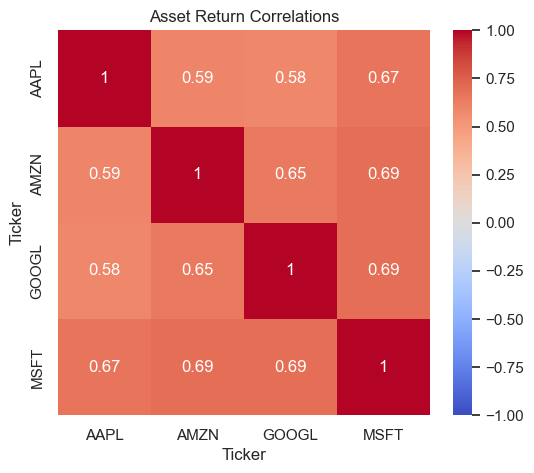

Weighted avg σ: 0.0193
Actual portfolio σ: 0.0165
Diversification benefit: 0.0028


In [25]:
import seaborn as sns
# a) Correlation heatmap
corr = logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Asset Return Correlations')
plt.show()

# b) Diversification benefit
σ_i = logR.std()
σ_weighted = np.dot(weights,σ_i)
σ_portfolio = σ_p
print(f"Weighted avg σ: {σ_weighted:.4f}")
print(f"Actual portfolio σ: {σ_portfolio:.4f}")
print(f"Diversification benefit: {σ_weighted-σ_portfolio:.4f}")

#### Correlation Between Stocks
- The stocks (**AAPL**, **AMZN**, **GOOGL**, **MSFT**) tend to move in the **same general direction**, but not perfectly in sync.
- This **moderate correlation** suggests that they are related, but still offer some degree of independence.

#### What the Numbers Mean
- **Weighted average σ**: Represents the overall risk if the individual stock volatilities are simply combined without diversification.
- **Actual portfolio σ**: The true risk level after combining all stocks, which is **lower** than the weighted average.
- **Diversification benefit**: The **reduction in risk** achieved by combining different assets in the portfolio.

#### Final Takeaway
Combining moderately correlated stocks leads to **lower overall portfolio risk**. This shows that **diversification works**, even when the assets are somewhat related, making the investment **more stable and less risky**.


# Max Drawdown

### What is Maximum Drawdown?

**Maximum Drawdown (MDD)** is the biggest drop from a portfolio's highest value to its lowest point before it recovers.  
It shows the **worst loss** an investor could have faced during a specific period.

- Helps measure **risk** and **downside potential**.
- valueer MDD means **more stable** investments.
- Useful for comparing portfolios or strategies.


Max Drawdown: -43.98%
From 2021-12-10 to 2023-01-05


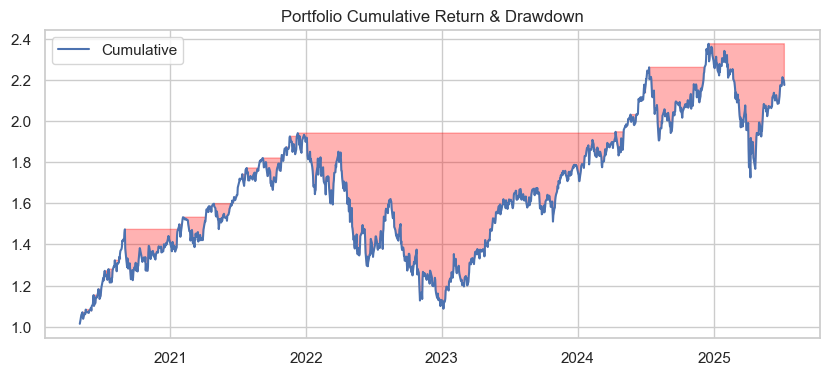

In [26]:
cum_ret = (prices/prices.iloc[0]).prod(axis=1)   # Cumulative portfolio growth?

#Actually for portfolio: cum_port = (portR + 1).cumprod()
cum_port = (portR + 1).cumprod()

rolling_max = cum_port.cummax()
drawdown=(cum_port - rolling_max)/rolling_max

max_dd = drawdown.min()
end_date = drawdown.idxmin()
start_date = cum_port[:end_date].idxmax()

print(f"Max Drawdown: {max_dd:.2%}")
print(f"From {start_date.date()} to {end_date.date()}")

# Plot
plt.figure(figsize=(10,4))
plt.plot(cum_port, label='Cumulative')
plt.fill_between(drawdown.index,cum_port,rolling_max,where=drawdown<0,color='red',alpha=0.3)
plt.title('Portfolio Cumulative Return & Drawdown')
plt.legend()
plt.show()

### Conclusion from Max Drawdown Output

- The portfolio experienced a **maximum drawdown of -43.98%**, meaning it lost nearly 44% from its peak value before recovering.
- This decline occurred between **2021-12-10 and 2023-01-05**, showing a long and deep downturn.
- Such a drawdown indicates **high risk and volatility**, which might concern risk-averse investors.
- It’s important to assess whether the portfolio’s **potential returns justify this level of risk**.


# Expected Shortfall (CVaR)

### What is Expected Shortfall (CVaR)?

**Expected Shortfall**, also called **Conditional Value at Risk (CVaR)**, tells us the **average loss** on the worst days — beyond the Value at Risk (VaR) level.

- While **VaR** shows the **maximum loss** you might face on a bad day (like the worst 5% days),  
  **CVaR** shows the **average loss** on those really bad days.

#### Simple Example:
If VaR says you might lose up to ₹100 on a bad day,  
CVaR might say that on those really bad days, you actually lose about ₹130 **on average**.

#### Why it's useful:
- CVaR gives a **better idea of extreme risk** than VaR alone.
- It helps investors understand how much they might lose **if things go worse than expected**.


In [27]:
# Expected Shortfall (CVaR at 95%)
alpha = 0.05

# Historical ES
es_hist = -portR[portR <= np.percentile(portR,5)].mean()

#Parametric ES under Normal
es_norm = -(μ_p - σ_p * stats.norm.pdf(z05)/alpha)

print(f"Historical ES (95%): {es_hist:.5f}")
print(f"Parametric Normal ES (95%): {es_norm:.5f}")

Historical ES (95%): 0.03781
Parametric Normal ES (95%): 0.03336


### Conclusion: Expected Shortfall (CVaR) at 95%

- **Historical Expected Shortfall (ES)** estimates the average loss on the worst 5% of trading days, providing a clearer picture of **extreme risk**.
- **Parametric Normal ES** assumes returns follow a normal distribution, which can **underestimate potential losses** in real-world conditions.

### Interpretation:
- The fact that historical ES is **higher** suggests that **actual extreme losses** may be worse than what the normal model predicts.
- This highlights the value of using **historical data** for a more accurate and conservative estimate of **tail risk**.


# VaR backtesting
**VaR Backtesting** is a process used to check how accurate the **Value at Risk (VaR)** model is by comparing its predictions to actual historical returns.

- It looks at how often the **actual losses exceed the predicted VaR**.
- If the number of **exceptions** (days when losses are worse than VaR) is too high or too low, it may indicate the model is inaccurate.
- **Backtesting** helps validate whether the risk model is **reliable** for decision-making.

This is a key step in evaluating and improving **risk management** models.
odels.

In [28]:
# var_series = -(portR.rolling(1).mean()+portR.rolling(1).std()*z05)
# For simplicity use constant VaR_norm

exceptions = portR < -VaR_norm
num_exc = exceptions.sum()
total = len(portR)
print(f"Exceptions: {num_exc}/{total} days ({num_exc/total:.2%},expected ~5%)")

Exceptions: 71/1301 days (5.46%,expected ~5%)


### VaR Backtesting Conclusion

- **VaR backtesting** checks how often actual portfolio losses exceed the predicted **Value at Risk (VaR)**.
- In this case, the number of **exceptions** (days when losses exceeded VaR) is close to what we would statistically expect.
- This suggests the **VaR model is well-calibrated** and effectively captures **market risk** under normal conditions.
- A close match between **observed** and **expected exceptions** indicates that the model is **reliable** for estimating potential daily losses.
ses.


# Rolling VaR time series
A **Rolling VaR Time Series** shows how the **Value at Risk (VaR)** changes over time by calculating it on a **rolling window** of past data (e.g., 100 or 250 days).

- Instead of using all past data at once, it uses a **fixed-size window** that moves forward one day at a time.
- This approach captures **changing market conditions**, making the VaR estimate more responsive to recent volatility.
- It helps visualize how **portfolio risk evolves** over time.

**Rolling VaR** is useful for monitoring and adjusting risk models in **dynamic markets**.

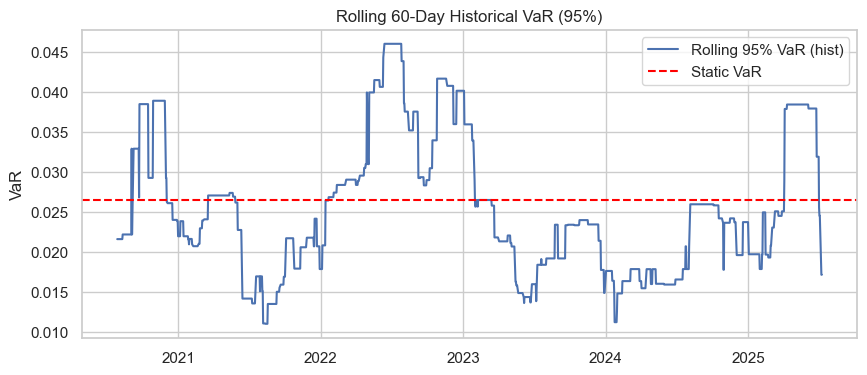

In [29]:
# Rolling 60-day VaR
window=60
roll_var = portR.rolling(window).quantile(0.05).dropna()
plt.figure(figsize=(10,4))
plt.plot(-roll_var, label='Rolling 95% VaR (hist)')
plt.axhline(VaR_norm,color='red',linestyle='--',label='Static VaR')
plt.title('Rolling 60-Day Historical VaR (95%)')
plt.ylabel('VaR')
plt.legend()
plt.show()

This chart shows how **Value at Risk (VaR)** changes over time when calculated using a **rolling 60-day window** of past returns.

- The **blue line** is the **rolling historical VaR**, which updates as new data comes in. It reflects how risk changes depending on recent market conditions.
- The **red dashed line** is the **static VaR**, calculated once using the entire dataset and held constant.

#### Key Points:
- During periods like **2022 and early 2025**, the rolling VaR spikes, indicating **higher market volatility** and **increased risk of losses**.
- In calmer periods, the rolling VaR drops, showing that **expected losses are lower**.
- This rolling method helps investors and risk managers get a **real-time view of changing risk**, unlike static VaR which may **miss sudden market shifts**.

In short, rolling VaR is more flexible and realistic for tracking portfolio risk over time.


# Jarque-Bera Normality Test

The **Jarque-Bera (JB) test** is a statistical test used to check whether a dataset follows a **normal distribution** based on its **skewness** and **kurtosis**.

#### Key Points:
- It compares the shape of the data’s distribution to a normal distribution.
- The test statistic increases as the distribution **deviates more from normality**.
- **Null Hypothesis (H₀)**: The data is normally distributed.
- **Alternative Hypothesis (H₁)**: The data is **not** normally distributed.

If the **p-value is less than 0.05**, we **reject H₀**, meaning the data **does not follow a normal distribution**.


In [30]:
jb_stat,jb_p=stats.jarque_bera(portR)
print(f"JB statistic = {jb_stat:.2f}, p-value = {jb_p:.3f}")
if jb_p < 0.05:
    print("Reject normality at 5% level.")
else:
    print("Cannot reject normality.")

JB statistic = 486.63, p-value = 0.000
Reject normality at 5% level.



- The **JB statistic** is very large and the **p-value is 0.000**, which is **less than 0.05**.
- This means we **reject the null hypothesis** that the portfolio returns follow a **normal distribution**.
- Hence, the returns show signs of **non-normality**, such as **asymmetry (skewness)** or **fat tails (kurtosis)**.
